In [ ]:
'''
This script plots histograms of objective function values fitting using differential evolution, basin hopping
and Monte-Carlo methods.
'''

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

/home/chen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


**RUN_0130**

In [25]:
#full = h5py.File('/home/chen/ar46/chi_values/run_0130.h5', 'r')
#orig_data = h5py.File('/home/chen/ar46/clean_events/clean_run_0130.h5', 'r')
proton_MC = h5py.File('/home/chen/ar46/MonteCarlo/proton_chi_values/run_0130_proton.h5', 'r')
#proton_DE = h5py.File('/home/chen/ar46/DiffEvolution/run_0130_proton.h5', 'r')
#proton_BH = h5py.File('/home/chen/ar46/Basinhopping/run_0130_proton.h5', 'r')
MC = h5py.File('/home/chen/ar46/MonteCarlo/chi_values/run_0130.h5', 'r')
#DE = h5py.File('/home/chen/ar46/DiffEvolution/chi_values/with_cleaning/run_0130.h5', 'r')
#BH = h5py.File('/home/chen/ar46/Basinhopping/chi_values/run_0130.h5', 'r')

#data set's names are: position, energy, total, vertex
dataset_name = '/vertex'
evt_full = MC[dataset_name]
print("# of clean events successfully processed - MC: " + str(len(evt_full)))

#dataset_name = '/total'
#evt_BH = BH[dataset_name]
#print("# of clean events successfully processed - BH: " + str(len(evt_BH)))

#dataset_name = '/total'
#evt_DE = DE[dataset_name]
#print("# of clean events successfully processed - DE: " + str(len(evt_DE)))

dataset_name = '/vertex'
proton_MC_full = proton_MC[dataset_name]
print("# of proton events successfully processed: " + str(len(proton_MC_full)))

#dataset_name = '/total'
#proton_DE_full = proton_DE[dataset_name]
#print("# of proton events successfully processed: " + str(len(proton_DE_full)))

#dataset_name = '/total'
#proton_BH_full = proton_BH[dataset_name]
#print("# of proton events successfully processed: " + str(len(proton_BH_full)))


# of clean events successfully processed - MC: 454
# of proton events successfully processed: 200


In [26]:
#creating arrays that contain all the objective function values for all the runs, fitted with each method

monte_carlo = np.empty((0,0))
proton_DE = np.empty((0,0))
proton_BH = np.empty((0,0))
proton_MC = np.empty((0,0))
differential_evolution = np.empty((0,0))
basinhopping = np.empty((0,0))

for i in range(10002):
    try:
        monte_carlo = np.append(monte_carlo, np.array(evt_full[str(i)]))
#        differential_evolution = np.append(differential_evolution, np.array(evt_DE[str(i)]))
#        basinhopping = np.append(basinhopping, np.array(evt_BH[str(i)]))

    except Exception:
        continue
for i in range(10002):
    try:
#        proton_BH = np.append(proton_BH, np.array(proton_BH_full[str(i)]))
        proton_MC = np.append(proton_MC, np.array(proton_MC_full[str(i)]))
#        proton_DE = np.append(proton_DE, np.array(proton_DE_full[str(i)]))
    except Exception:
        continue    
print(len(monte_carlo))
print(len(proton_MC))

454
200


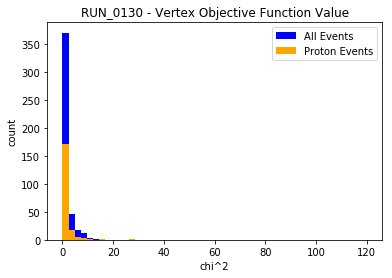

In [28]:
plt.hist(monte_carlo, label='All Events', bins=50, color='blue',range=(0,120)) 
plt.hist(proton_MC, label='Proton Events', bins=50, color='orange',range=(0,120))
#plt.hist(basinhopping, label='less cut', bins=50, color='cyan',range=(0,40))
#plt.hist(proton_BH, label='Cleaned Data', bins=50, color='orange',range=(0,120))
#plt.hist(basinhopping, label='less cut', bins=50, color='cyan',range=(0,40))
#plt.hist(proton_DE, label='more cut', bins=50, color='orange',range=(0,40))
plt.legend(loc=1)
plt.title('RUN_0130 - Vertex Objective Function Value')
plt.xlabel('chi^2')
plt.ylabel('count')
plt.show()
